In [43]:
import random
import sys
import serial
from PyQt5 import QtCore, QtGui, QtWidgets
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvas

class MainWindow(QtWidgets.QMainWindow):
    def __init__(self):
        super().__init__()
        
        # Create the serial port object
        self.ser = serial.Serial()
        self.ser.baudrate = 9600
        self.ser.port = 'COM3'
        self.ser.open()
        
        # Create the figure and canvas for the plot
        self.figure = Figure()
        self.canvas = FigureCanvas(self.figure)
        self.ax = self.figure.add_subplot(111)
        
        # Create the label to display the plot
        self.label = QtWidgets.QLabel(self)
        self.label.setGeometry(QtCore.QRect(0, 0, 640, 480))
        
        # Set the initial data for the plot
        self.x = [i for i in range(100)]
        self.y = [random.randint(0, 100) for i in range(100)]
        self.ax.plot(self.x, self.y)
        
        # Display the plot on the label
        self.label.setPixmap(self.canvas.grab())
        
        # Create the timer to update the plot
        self.timer = QtCore.QTimer()
        self.timer.timeout.connect(self.update_plot)
        self.timer.start(1000)
        
        self.show()

    def update_plot(self):
        byte = opened_serial_port.read(2) 
        while byte:
            if byte != mask:
                byte = byte.hex()
                data = int(byte, 16)
                self.x.pop(0)
                self.y.pop(0)
                self.x.append(self.x[-1] + 1)
                self.y.append(data)
                self.ax.clear()
                self.ax.plot(self.x, self.y)
                self.label.setPixmap(self.canvas.grab())
                byte = opened_serial_port.read(2)
            else:
                byte = opened_serial_port.read(2)


<class 'pandas.core.frame.DataFrame'>
Index(['c', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918',
       '1919'],
      dtype='object', length=1921)


In [58]:
import pandas as pd
import numpy as np
sensor_data30 = pd.read_csv('left_mid.csv')
print(type(sensor_data30))
#print(sensor_data30)
print(sensor_data30.columns)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
sensor_data30 = imputer.fit_transform(sensor_data30)

In [61]:
import pandas as pd

#df = sensor_data30.fillna(value=0)
scaler = MinMaxScaler()
df = scaler.fit_transform(sensor_data30)

In [ ]:
reshaped_sensor_data30 = np.resize(sensor_data30, (11, 11))
np.savetxt("reshape_data30.csv", reshaped_sensor_data30)

In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Drop missing values
#mean_values = sensor_data_col.mean()
#df = sensor_data_col.fillna(mean_values)

# Scale the data
scaler = MinMaxScaler()
reshaped_sensor_data30[['1']] = scaler.fit_transform(reshaped_sensor_data30[['1']])

# Create new features
reshaped_sensor_data30['1_squared'] = reshaped_sensor_data30['1'] ** 2
reshaped_sensor_data30['1_cubed'] = reshaped_sensor_data30['1'] ** 3

# One-hot encode categorical variables
df = pd.get_dummies(sensor_data30, columns=['1'])

#if 'location' in df.columns:
#    df = pd.get_dummies(df, columns=['col'])
#else:
 #   print("The column 'location' does not exist in the DataFrame.")

# Split the data into training and test sets
X = df['1']
y = df['1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1140   723   736  9429  3659  8992   703   714  3157   816   788  2560
 20215  1170  1120  3246  2665  1268  1174 13963   735   704  2614  2164
  1016].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


mean_values = df.mean()
df = df.fillna(mean_values)

X = df[['col1','col2','col3','col5','col6','col7',
                                         'col8','col9','col10','col11','col12','col13','col14',
                                         'col15','col16','col17','col18','col19','col20','col21',
                                         'col22','col23','col24','col25']]
y = df['col25']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import serial
import serial.tools.list_ports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

baud_rate = 115200
mask_header = b'\xfa'
mask_tail = b'\xfe\xfe'
mask_serial_number = bytes(b'\x80\x00')

In [2]:
def int_from_bytes(xbytes: bytes) -> int:
    temp = bytearray(xbytes)
    temp.reverse()
    temp = int.from_bytes(temp, byteorder="big", signed=False)
    return temp

def bitwise_and_bytes(a, b):
    result_int = int.from_bytes(a, byteorder="big") & int.from_bytes(b, byteorder="big")
    return result_int.to_bytes(max(len(a), len(b)), byteorder="big")

def open_serial_port(port_number, baud_rate):
    serial_port = serial.Serial(port_number, baud_rate)
    return serial_port

In [3]:
ports = list(serial.tools.list_ports.comports())
ports = sorted(ports)
serial_port = None
for p in ports:
    # find serial ports
    if "Serial Port" in p[1]: # [1] returns description of a port
        serial_port = p
        break
        

In [8]:
port_number = serial_port[0]
try:
    opened_serial_port = open_serial_port(port_number, baud_rate)     
except:
    opened_serial_port = None
    opened_serial_port = open_serial_port(port_number, baud_rate) 

buffers = []
byte = opened_serial_port.read(1)    
while byte:
    buffer = []
    if byte == mask_header:
        temp_header = byte
        byte = opened_serial_port.read(1)
        
        if byte == mask_header:
            header = temp_header + byte
            
            buffer.append(int_from_bytes(header))
            byte = opened_serial_port.read(2)
            
            while byte:
                if byte != mask_tail:
                    temp = int_from_bytes(byte)
                    buffer.append(temp)
                    
                    if len(
                        buffer) == 2:
                        b_array = bytearray(byte)
                        b_array.reverse()
                        temp_bitwise_and = bitwise_and_bytes(b_array, mask_serial_number)
                        buffer[-1] = int_from_bytes(temp_bitwise_and)
                    
                    byte = opened_serial_port.read(2)
                
                else:
                    tail = int_from_bytes(byte)
                    buffer.append(tail)
                    buffers.append(buffer)
                    break
                    
    byte = opened_serial_port.read(1)
    if len(buffers) == 30:
        break
    #print("len(buffer):{}, byte:{}".format(len(buffers), byte))
    mat = np.array(buffer)[2:2050]
    mat = mat.reshape(64, 32)
    print("current round:{}".format(len(buffers)), end='\r')
    #plt.imshow(mat.reshape(64, 32))

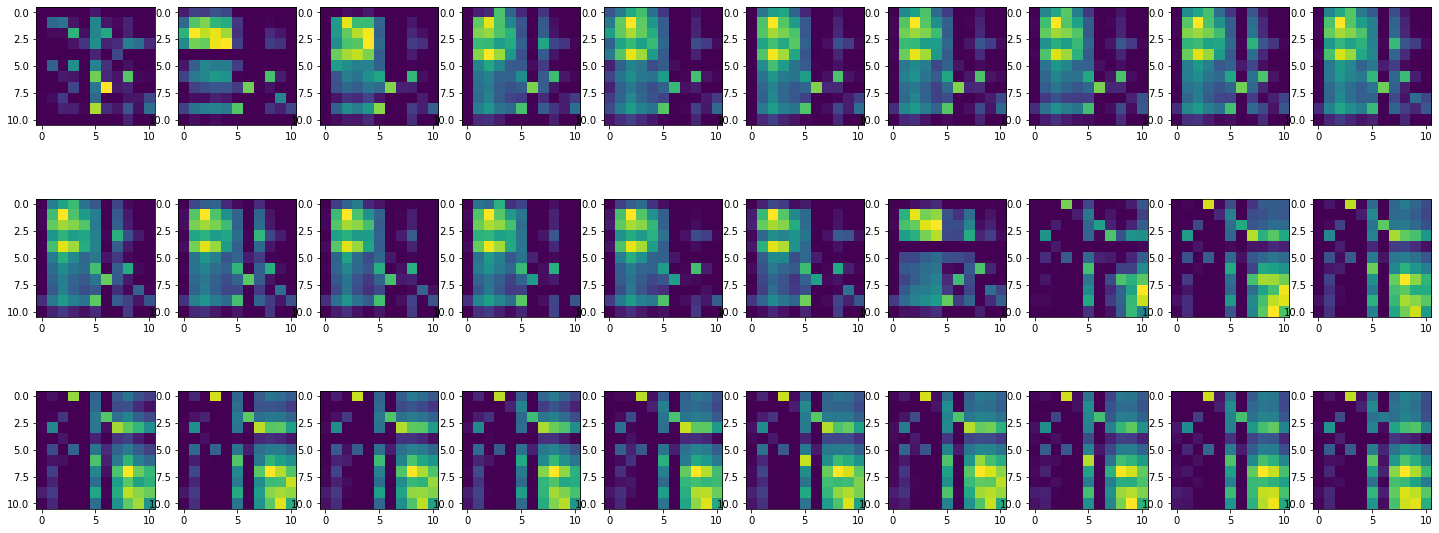

In [22]:
buffers2 = buffers
max_col = 32
max_row = 64
max_bytes = max_row * max_col
matrix = np.zeros((len(buffers2), max_row, max_col))

for i, buffer in enumerate(buffers2):
    pressure_sensor =buffer[2:2+max_bytes]
    matrix[i] = np.array(pressure_sensor).reshape(max_row, max_col)

df = pd.DataFrame(matrix.reshape(-1, 32).T)
df.to_csv("upper_loeft_lower_left.csv")
plt.figure(figsize=(25, 10))
num_fig_col = 10
num_fig_row = len(matrix) // num_fig_col
p = 1
for i in range(0, num_fig_row):
    for j in range(0, num_fig_col):
        plt.subplot(num_fig_row, num_fig_col, p)
        plt.imshow(matrix[p-1, :11,:11].T)
        #plt.imshow(matrix[p-1, 1:12,:11].T)
        p += 1

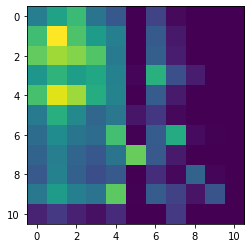

In [15]:
plt.imshow(matrix[10, 1:12,:11].T)

In [112]:
matrix[0, :11, :11]

array([[  888.,   733.,  1965., 17230.,   735.,   793.,   978.,   744.,
          737.,  7662.,   802.],
       [10146.,   741., 29286., 12373.,   870., 22244., 16365., 10666.,
         5311., 14376.,  6309.],
       [ 2230.,   730., 19967.,  9292.,   779., 18575., 14893.,  5511.,
        19523., 12676.,  5052.],
       [13900.,   721., 10366.,  2860.,   744.,  1993.,  1733.,  4296.,
          831.,  2015., 15496.],
       [  794.,   731.,  1289., 11057.,   742.,   763.,   929.,   764.,
          742.,  1434., 27929.],
       [ 8258.,   873., 24182., 17272., 10086., 11639., 28171., 12144.,
         9852., 33263., 14592.],
       [  748.,   732.,   844.,   771.,   742.,   779.,   736.,   864.,
          723.,   850.,  1197.],
       [  798.,   725.,  2880., 10751.,   737.,   894.,  3926.,  2857.,
         2380., 13747.,  2679.],
       [  793.,   726.,   770.,   890.,   752.,   768.,   895.,   742.,
        15554.,  2768.,  1038.],
       [ 1056.,   719., 10036., 13183.,  7375.,  6325.,

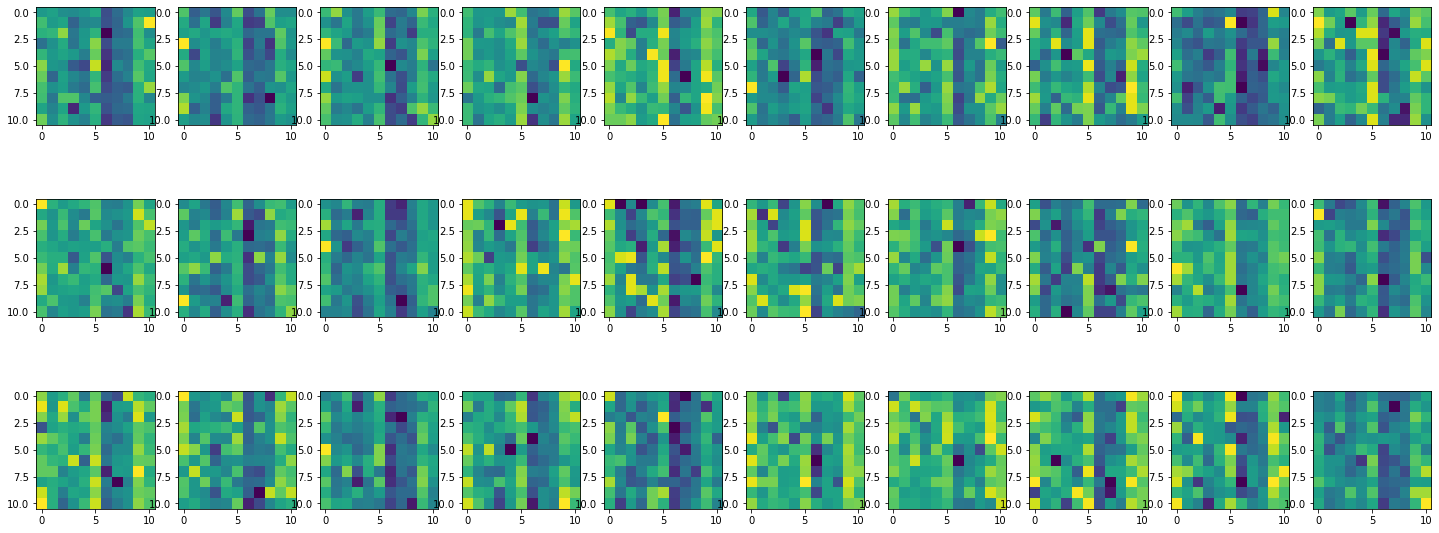

In [6]:
buffers1 = buffers
max_col = 32
max_row = 64
max_bytes = max_row * max_col
matrix = np.zeros((len(buffers1), max_row, max_col))

for i, buffer in enumerate(buffers1):
    pressure_sensor =buffer[2:2+max_bytes]
    matrix[i] = np.array(pressure_sensor).reshape(max_row, max_col)
plt.figure(figsize=(25, 10))
num_fig_col = 10
num_fig_row = len(matrix) // num_fig_col
p = 1
for i in range(0, num_fig_row):
    for j in range(0, num_fig_col):
        plt.subplot(num_fig_row, num_fig_col, p)
        plt.imshow(matrix[p-1, :11,:11])
        p += 1

In [53]:
df = pd.read_csv("balance_3.csv")

In [54]:
df = df.to_numpy()

In [55]:
df = df[:, 1:]
matrix = df.reshape(-1,64, 32)

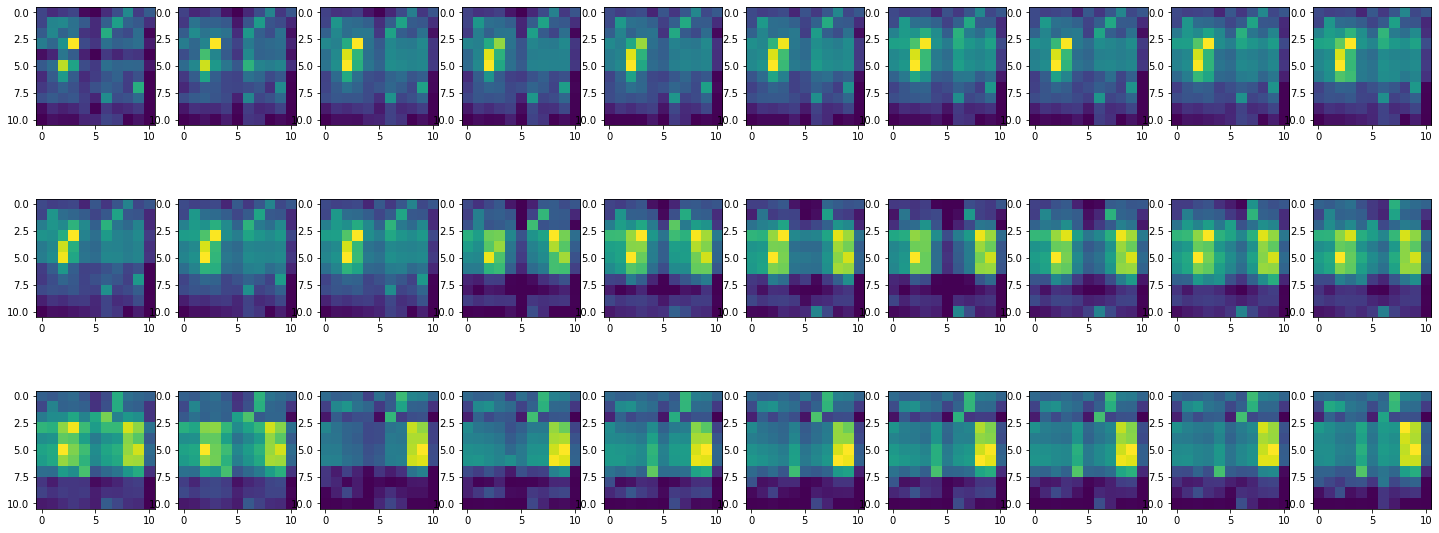

In [56]:
plt.figure(figsize=(25, 10))
num_fig_col = 10
num_fig_row = len(matrix) // num_fig_col
p = 1
for i in range(0, num_fig_row):
    for j in range(0, num_fig_col):
        plt.subplot(num_fig_row, num_fig_col, p)
        plt.imshow(matrix[p-1, :11,:11])
        p += 1